In [1]:
import sys
import PIL
import numpy as np
import tensorflow as tf
import config
import os
from matplotlib import pyplot as plt
import my_tools
from my_tools import get_image_with_label as get_image

In [2]:
img_size = config.CNN_IN_HEIGHT
src_dir = config.PIC_SRC_DIR
dst_dir = config.DATA_DIR
src_labels = config.LABEL_ORG

In [3]:
#Get conversions for TFRecord type file
def to_float_convert(value):
    return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))
def to_int_convert(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))
def to_bytes_convert(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

In [4]:
def createTFRecord(file_name, index):
    """
    Codes data into TFRecord and according data type
    """
    path = os.path.join(config.DATA_DIR, file_name)
    writer = tf.python_io.TFRecordWriter(path)
    for i in range(len(index)):
        img, label = get_image(index[i])
        clas = label[0].astype(np.int32)
        feature = {"image" : to_bytes_convert(img.tobytes()),
                   "class" : to_int_convert(clas),
                   "x1" : to_float_convert(label[1]),
                   "y1" : to_float_convert(label[2]),
                   "x2" : to_float_convert(label[3]),
                   "y2" : to_float_convert(label[4]),
                   "index" : to_int_convert(index[i])
                          
                  }
        
        example = tf.train.Example(features=tf.train.Features(feature=feature))
        writer.write(example.SerializeToString())
        
    writer.close()
    sys.stdout.flush()
        
        

In [5]:
def main(src_dir, dst_dir, src_labels, force = False):
    """
    Creates 3 datasets divided 6:2:2, train,test,val
    """
    labels = np.load(src_labels)
    files = os.listdir(src_dir)
    if len(files) == labels.shape[0]:
        print("Same ammount of labels and files")
    names = config.TFRECORD_NAMES
    if force == True:
        for n in range(0,3):
            to_rm = os.path.join(config.DATA_DIR, names[n])
            if os.path.exists(to_rm):   
                print("removing")
                os.remove(to_rm)
                
    index = np.random.permutation(labels.shape[0])
    train_index = index#index[0:int(0.6*len(index))]
    #test_index = index[int(0.6*len(index)):int(0.8*len(index))]
    #val_index = index[int(0.8*len(index)):]
    
    createTFRecord(names[0], train_index)
    print("created train record")
    #createTFRecord(names[1], test_index)
    print("created test record")
    #createTFRecord(names[2], val_index)
    print("created val record")

In [6]:
if __name__ == '__main__' :
    main(src_dir, dst_dir, src_labels, force = True)

Same ammount of labels and files
created train record
created test record
created val record


14
0.26171875 0.33984375 0.4921875 0.5703125
185
0.484375 0.46875 0.76171875 0.74609375
333
0.57421875 0.234375 0.890625 0.55078125
288
0.47265625 0.3671875 0.625 0.51953125
88
0.1875 0.30859375 0.65234375 0.7734375
335
0.14453125 0.41015625 0.5546875 0.8203125
264
0.18359375 0.44921875 0.40625 0.671875
178
0.3125 0.34765625 0.80859375 0.84375
299
0.6171875 0.26953125 0.78515625 0.4375
262
0.1015625 0.20703125 0.41796875 0.5234375
202
0.1328125 0.44921875 0.49609375 0.8125
341
0.37890625 0.41015625 0.8515625 0.8828125
321
0.51171875 0.4453125 0.7890625 0.72265625
239
0.55078125 0.57421875 0.8046875 0.828125
86
0.24609375 0.09375 0.6015625 0.44921875
355
0.2890625 0.4765625 0.66796875 0.85546875
244
0.48046875 0.1484375 0.90625 0.57421875
55
0.32421875 0.21875 0.5078125 0.40234375
175
0.50390625 0.44140625 0.796875 0.734375
191
0.4296875 0.43359375 0.90234375 0.90625
214
0.07421875 0.3203125 0.53125 0.77734375
57
0.59375 0.58203125 0.87109375 0.859375
301
0.62109375 0.203125 0.765625 0.

D:\Python\envs\tf\lib\site-packages\ipykernel_launcher.py:38: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


162
0.484375 0.3046875 0.68359375 0.50390625
159
0.0703125 0.42578125 0.44921875 0.8046875
376
0.28125 0.14453125 0.62890625 0.4921875
310
0.25 0.2109375 0.70703125 0.66796875
343
0.07421875 0.3203125 0.53125 0.77734375
196
0.140625 0.16015625 0.60546875 0.625
395
0.328125 0.47265625 0.63671875 0.78125
17
0.58984375 0.265625 0.796875 0.47265625
336
0.37890625 0.63671875 0.5546875 0.8125
307
0.18359375 0.32421875 0.359375 0.5
130
0.6328125 0.35546875 0.79296875 0.515625
36
0.51953125 0.1953125 0.828125 0.50390625
41
0.35546875 0.22265625 0.59375 0.4609375
271
0.171875 0.11328125 0.59765625 0.5390625
52
0.45703125 0.4609375 0.6796875 0.68359375
128
0.515625 0.20703125 0.86328125 0.5546875
39
0.16796875 0.2109375 0.4609375 0.50390625
217
0.015625 0.171875 0.50390625 0.66015625
277
0.1171875 0.453125 0.44921875 0.78515625
374
0.33203125 0.390625 0.59375 0.65234375
127
0.41796875 0.1953125 0.859375 0.63671875
221
0.13671875 0.36328125 0.6328125 0.859375
76
0.39453125 0.4296875 0.8046875 0.8

0.59765625 0.31640625 0.734375 0.453125
87
0.30859375 0.05078125 0.796875 0.5390625
245
0.109375 0.3671875 0.52734375 0.78515625
201
0.3125 0.35546875 0.48046875 0.5234375
314
0.26171875 0.60546875 0.5078125 0.8515625
246
0.0625 0.15625 0.44921875 0.54296875
135
0.1640625 0.43359375 0.59765625 0.8671875
361
0.34375 0.140625 0.79296875 0.58984375
27
0.1640625 0.3515625 0.38671875 0.57421875
383
0.375 0.2265625 0.59765625 0.44921875
42
0.35546875 0.37890625 0.59375 0.6171875


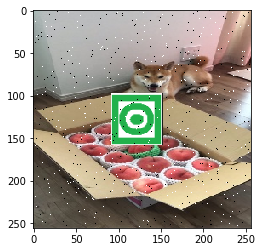

In [7]:
#Scrypt to check if everything above works as supposed

path_to_record = os.path.join(config.DATA_DIR,config.TFRECORD_NAMES[0])
record_iterator = tf.python_io.tf_record_iterator(path=path_to_record)

for string_record in record_iterator:
    
    example = tf.train.Example()
    example.ParseFromString(string_record)
    
    x1 = (example.features.feature['x1']
                                 .float_list
                                 .value[0])
    
    
    x2 = (example.features.feature['x2']
                                 .float_list
                                 .value[0])
    
    y1 = (example.features.feature['y1']
                                 .float_list
                                 .value[0])
    

    y2 = (example.features.feature['y2']
                                 .float_list
                                 .value[0])
    
    index =(example.features.feature['index']
                                    .int64_list
                                    .value[0])
    
    img_string = (example.features.feature['image']
                                  .bytes_list
                                  .value[0])
    
    
    img_1d = np.fromstring(img_string, dtype=np.uint8)
    reconstructed_img = img_1d.reshape((256, 256, -1))
    
    print(index)
    print(x1,y1,x2,y2)
my_tools.show_opened_image(reconstructed_img)


[1.         0.26171875 0.33984375 0.4921875  0.5703125 ]


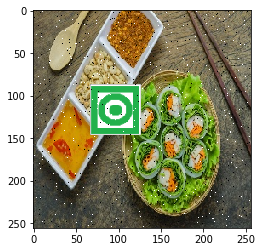

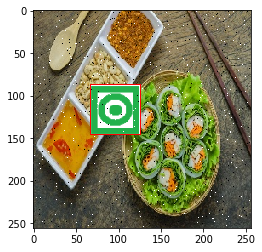

0.26171875


In [9]:
my_tools.show_image(15)
my_tools.show_label_on_img(15)
x,y = my_tools.get_image_with_label(14)
print(y[1])